In [1]:
!pip install umap-learn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import socket
import glob
import numpy as np

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=ea58c38af9f511f918856ee4dd658db72bd3fa8e49c994a5077647c8cf0b493b
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=0d4412eac4e69c68717be8c0e57749295c3efc0ff7eca1ff0dc4e502b30cb13e
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
df = []
df.append(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PLIKI_CSV/connected_3malware_benign.csv'))
df = pd.concat(df, ignore_index=True)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.dropna()

df.loc[(df[' Label'] > 1)] = 1

In [3]:
print(df[' Label'].unique())

[1 0]


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

df_sample = df.sample(10000)
X, y = df_sample.drop(' Label', axis=1), df_sample[[' Label']].values.flatten()

# Preprocess
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

UMAP

In [11]:
manifold = umap.UMAP().fit(X, y)
X_reduced = manifold.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [12]:
X_reduced.shape

(10000, 2)

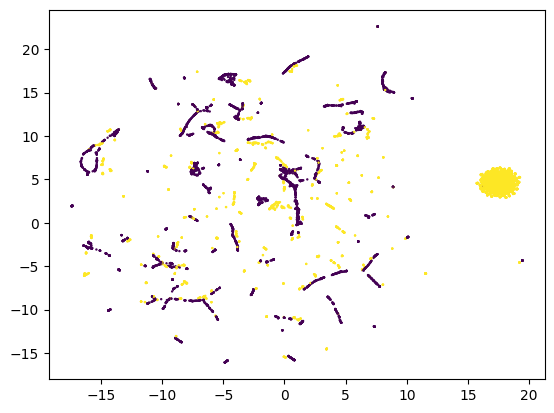

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=0.5);

In [14]:
from sklearn.preprocessing import QuantileTransformer

# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="mean"), QuantileTransformer())
X = pipe.fit_transform(X.copy())

# Fit UMAP to processed data
manifold = umap.UMAP().fit(X, y)
X_reduced_2 = manifold.transform(X)

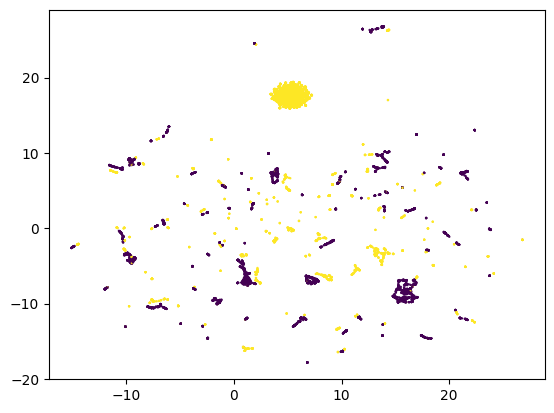

In [15]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=y, s=0.5);

KONIEC